# **Construcción de modelo Random Forest**

# **Importación de librerías necesarias** 

In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# **Carga de los datos**

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
X_train = train.drop('class', axis=1)
y_train = train['class'].copy()
X_test = test.drop('class', axis=1)
y_test = test['class'].copy()

# **Entrenamiento y predicción** 

In [3]:
rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [4]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# **Métricas del modelo** 

In [5]:
rf.score(X_test,y_test)

0.8958529688972667

In [6]:
# Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.8958529688972667

In [7]:
# Matthew Correlation Coefficient
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_test_pred)

0.7949895316182112

In [8]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[2076,  113],
       [ 329, 1726]], dtype=int64)

In [9]:
# Reporte de clasificación
from sklearn.metrics import classification_report

model_report = classification_report(y_test, y_test_pred, target_names=['positive','negative'])

f = open('rf_model_report.txt','w')
f.writelines(model_report) 
f.close()

In [10]:
# Devolver la importancia de los features del modelo
importance = pd.Series(rf.feature_importances_, name = 'Gini')

# Devolver los nombre de los features
feature_names = pd.Series(X_train.columns, name = 'Feature')

In [11]:
# Combinar los nombre de los nombres de los features y los valores de Gini en un Dataframe
df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
df

,Feature,Gini
0,AAC_A,0.005676
1,AAC_C,0.029432
2,AAC_D,0.017090
3,AAC_E,0.028443
4,AAC_F,0.004891
...,...,...
108,QSO1_SC_A,0.006187
109,QSO1_SC_K,0.023179
110,QSO1_SC_L,0.009965
111,QSO1_SC_R,0.006020


Text(0.5, 0, 'Feature Importance')

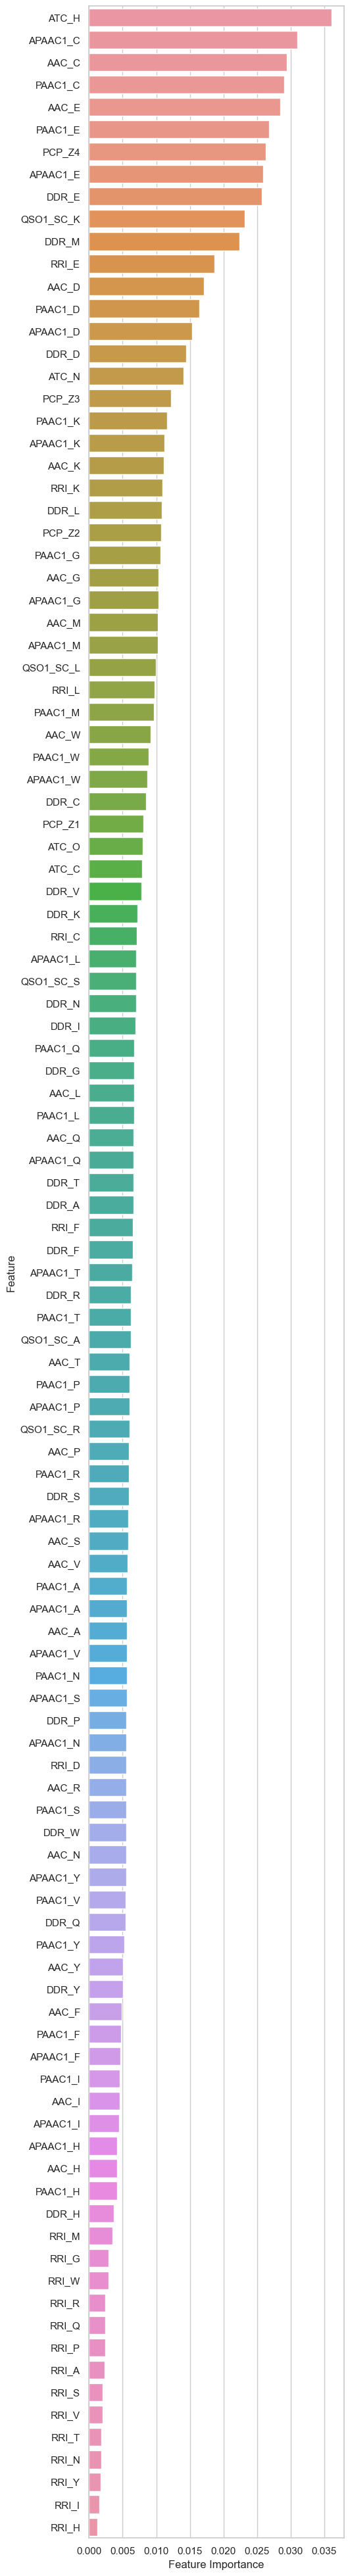

In [14]:
# Plot of feature importance
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values('Gini', ascending=False) # Sort by Gini in descending order; Showing only the top 20 results

plt.figure(figsize=(5, 50))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted)
plt.xlabel("Feature Importance")

<Axes: >

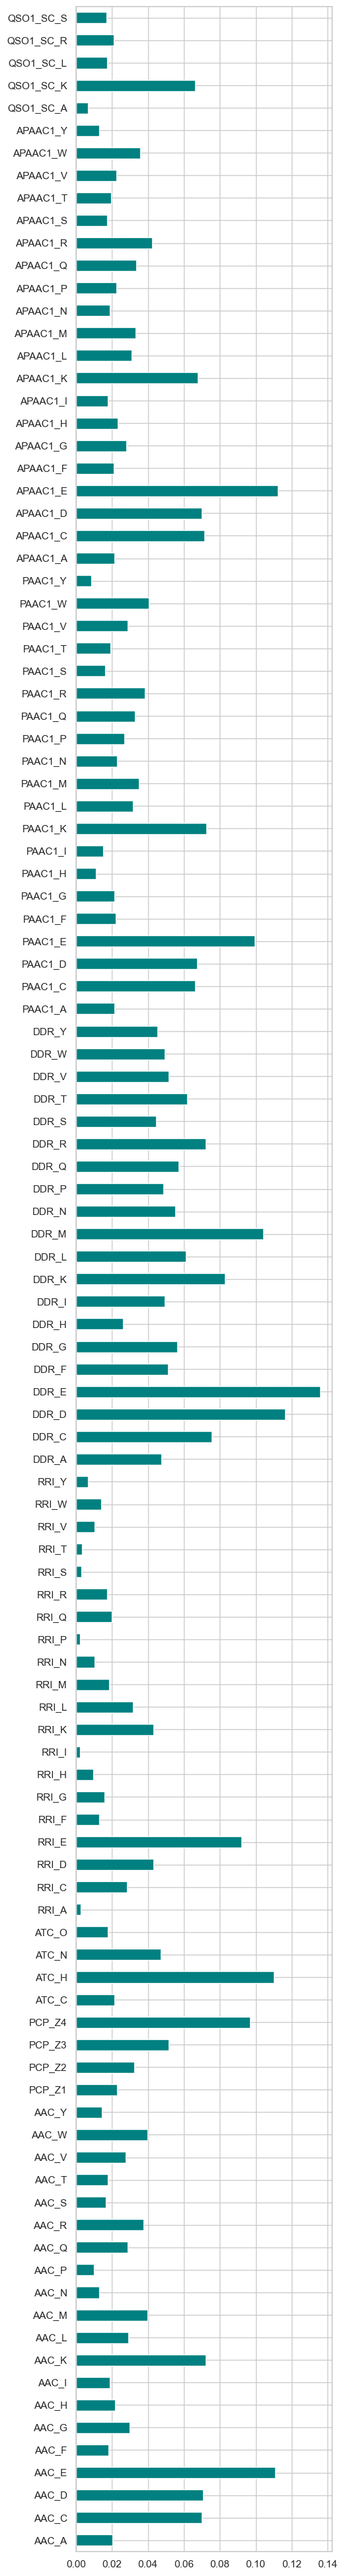

In [16]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(5, 50))
importances = mutual_info_classif(X_train, y_train)
feat_importances = pd.Series(importances, X_train.columns[0:len(X_train.columns)])
feat_importances.plot(kind='barh', color='teal')